# IMEC2201 Herramientas Computacionales 
## Taller Semana 7: Dinámica
### Fecha Límite Entrega (Bloque Neón): <font color="#FF5733">23.59h de Mayo 29, 2022</font>

Universidad de los Andes — Mayo 18, 2022.
___
### Tener en Cuenta
La entrega del Taller 7 se puede realizar de tres maneras:
1. Cargar la solución en su repositorio en GitHub y enviar el enlace del mismo vía Bloque Neón.
2. Enviar vía Bloque Neón el archivo en Jupyter Notebook (extensión '.ipynb').
3. Enviar vía Bloque Neón el archivo PDF del Jupyter Notebook.
___


# Semana 7: Dinámica de Sistemas Mecánicos

El análisis para el diseño, mantenimiento y estudio de mecanismos es escencial para la ingeniería mecánica. Una de las formas más comunes para realizar esta tarea es mediande el uso de sistemas de control, y una parte fundamental de este análisis es comprender las ecuaciones diferenciales que gobiernan los diferentes modelos. Parte de comprender este tipo modelos matemáticos, resulta en realizar ciertas operaciones de manera númerica, tales como la integración y diferenciación. 

Para este taller, es necesario usar el paquete ``DifferentialEquations.jl``, además del ya conocido ``Plots.jl``. También es importante instalar el paquete de integración numérica ``NumericalIntegration.jl``.

## Integración numérica

En ciertas ocasiones, se tienen datos sobre algunas cantidades de interés que fueron medidas en laboratorio, y su análisis diferencial debe realizarse numéricamente debido a que analíticamente es complejo aproximar una función exclusivamente para encontrar sus derivadas. En este caso, usamos el paquete de integración numérica, el cual usa diferentes métodos de integración, pero por ahora solo nos enfocaremos en el método trapezoidal. A continuación podremos ver una aplicación de este método. 

Para ello, podríamos analizar los datos de aceleración sobre 3 ejes que fueron medidos en el viaje de un ascensor de 6 pisos.

In [1]:
using Pkg
Pkg.activate(pwd())
Pkg.instantiate()

  Activating project at `c:\Users\danie\OneDrive\Documentos\GitHub\ua-imec2001-hc-202210\Herrmainetas C\content\week7`


In [2]:
# Importar paquetes
using DataFrames, CSV, Plots, NumericalIntegration, DifferentialEquations

In [3]:
# importar datos
import CSV
df_subida = DataFrame(CSV.File("./data/subida.csv"))
df_bajada = DataFrame(CSV.File("./data/bajada.csv"))

,time,ax,ay,az,atotal
,Float64,Float64,Float64,Float64,Float64
1,0.00338078,-0.14,0.02,1.89,1.89
2,0.014616,-0.49,-0.45,-0.16,0.68
3,0.0181928,-0.59,-0.68,-0.89,1.26
4,0.029273,-0.25,-0.44,-0.57,0.76
5,0.039175,0.08,0.02,-0.07,0.1
6,0.049068,0.11,0.16,0.38,0.42
7,0.0590568,0.06,0.11,0.58,0.59
8,0.0690451,-0.02,0.19,0.43,0.47
9,0.079071,-0.04,0.32,0.25,0.4


Ahora con los datos en memoria, notemos el comportamiento de las aceleraciones en el eje x:

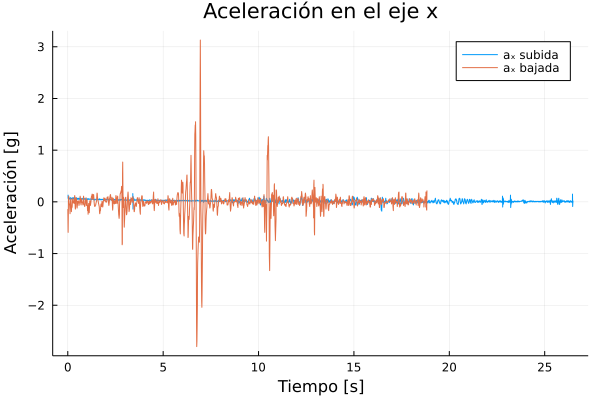

In [4]:
plot(df_subida.time, df_subida.ax, label = "aₓ subida")
plot!(df_bajada.time, df_bajada.ax, label = "aₓ bajada")
title!("Aceleración en el eje x")
xlabel!("Tiempo [s]")
ylabel!("Aceleración [g]")

Se puede notar que de bajada, la aceleración en este eje es volátil.

Ahora, si quisieramos saber la velocidad en este eje, tendríamos que realizar una integración numérica, ya que no tenemos una función explícita para la cual realizar una integración.

Se utiliza la función ``cumul_integrate()`` debido a que es una integral acumulada, así se tiene una serie de datos que se aproxima a la integración real acumulada sobre los puntos a integrar.

En el caso se usar la función `integrate()` se estaría calculando la integral definida, y no es lo que realmente estamos buscando. 

In [4]:
# Pasar de Gs a m/s^2

# Recordar que estamos usando los valores en el eje X

acc_subida = df_subida.ax .* 9.81
acc_bajada = df_bajada.ax .* 9.81

vel_subida = cumul_integrate(df_subida.time, acc_subida)
vel_bajada = cumul_integrate(df_bajada.time, acc_bajada)

1890-element Vector{Float64}:
 -0.034718567991256714
 -0.06943713598251343
 -0.08838464069366456
 -0.13403754873275758
 -0.14229433178901674
 -0.1330746058702469
 -0.12474545767307281
 -0.12278575165271759
 -0.1257363970041275
 -0.13012742207050323
 -0.1360339986562729
 -0.1603349333524704
 -0.1666136501312256
  ⋮
 -2.4641311644315733
 -2.456221986651422
 -2.4486776751279846
 -2.4435521462202088
 -2.4435521462202088
 -2.444537846446039
 -2.4406053951144235
 -2.422154669845106
 -2.4172476864695565
 -2.428129495131971
 -2.4432708132863064
 -2.44031455460787

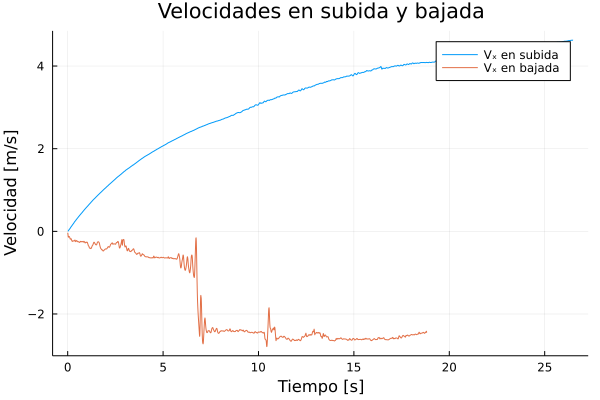

In [6]:
plot(df_subida.time, vel_subida, label = "Vₓ en subida")
plot!(df_bajada.time, vel_bajada, label = "Vₓ en bajada")
title!("Velocidades en subida y bajada")
xlabel!("Tiempo [s]")
ylabel!("Velocidad [m/s]")

Se puede observar que el área bajo la curva en subida tiende a ser positiva siempre, viceversa para el caso de la bajada. Observando la aceleracion en bajada, se tiene un comportamiento inestable, así mismo logran comportarse sus variantes diferenciales. 

Se podría hacer lo mismo para un caso de encontrar la posición:

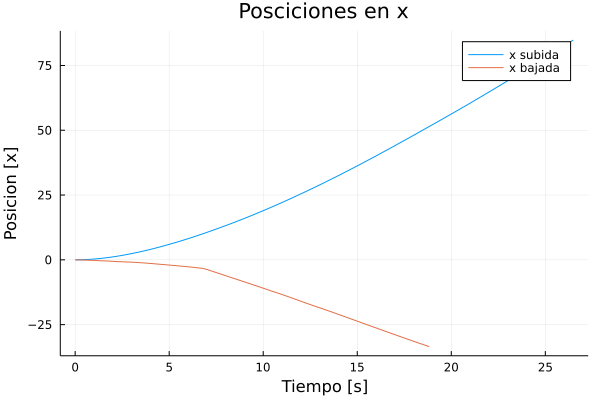

In [7]:
pos_subida = cumul_integrate(df_subida.time, vel_subida)
pos_bajada = cumul_integrate(df_bajada.time, vel_bajada)

plot(df_subida.time, pos_subida, label = "x subida")
plot!(df_bajada.time, pos_bajada, label = "x bajada")
title!("Posciciones en x")
xlabel!("Tiempo [s]")
ylabel!("Posicion [x]")

Claramente los resultados obtenidos no son realistas, eso se debe al ruido y a la calidad del instrumento de medicion. Es importante reconocer este tipo de detalles a la hora de realizar un análisis de los datos a la hora de graficarlos.


# Ejercicio 1
Ahora, le corresponde al estudiante realizar este mismo procedimiento, mostrando las gráficas de velocidad y posición a partir de los datos de subida y bajada los ejes $y$ y $z$.

In [ ]:
function intergracion_numerica(n)
    if n == 1
        accy_subida = df_subida.ay .* 9.81
        accy_bajada = df_bajada.ay .* 9.81
        vel_subiday = cumul_integrate(df_subida.time, accy_subida)
        vel_bajaday = cumul_integrate(df_bajada.time, accy_bajada)
        pos_subiday = cumul_integrate(df_subida.time, vel_subiday)
        pos_bajaday = cumul_integrate(df_bajada.time, vel_bajaday)


        plot(df_subida.time, vel_subiday, label = "Vy en subida")
        plot!(df_bajada.time, vel_bajaday, label = "V_y en bajada")
        plot!(df_subida.time, pos_subiday, label = "y subida")
        plot!(df_bajada.time, pos_bajaday, label = "y bajada",  
        xlabel="Tiempo (t)",ylabel="v (m/s) & pos(y (m))")   
    elseif n == 2

        accz_subida = df_subida.az .* 9.81
        accz_bajada = df_bajada.az .* 9.81
        vel_subidaz = cumul_integrate(df_subida.time, accz_subida)
        vel_bajadaz = cumul_integrate(df_bajada.time, accz_bajada)
        pos_subidaz = cumul_integrate(df_subida.time, vel_subidaz)
        pos_bajadaz = cumul_integrate(df_bajada.time, vel_bajadaz)


        plot(df_subida.time,vel_subidaz, label = "Vz en subida")
        plot!(df_bajada.time, vel_bajadaz, label = "Vz en bajada")
        plot!(df_subida.time, pos_subidaz, label = "z subida")
        plot!(df_bajada.time, pos_bajadaz, label = "z bajada",
        xlabel="Tiempo (t)", ylabel="v (m/s) & pos(z (m))")
    end
end

function interfase()
    println("\nIndique que grafica quiere visualizar:
            \n1. Posición y velocidad en y.
            \n2. Posición y velocidad en z.")
    op = parse(Int64,readline())
    if op == 1
        intergracion_numerica(1)
    elseif op == 2
        intergracion_numerica(2)
    else
        "Seleccione una opción valida."
    end
end
interfase()


# Ejercicio 2: Sistema de suspensión

Un análisis simplificado de sistemas de suspensión se puede interpretar como un sistema masa - resorte - amortiguador. Esta ecuación diferencial se puede expresar de la siguiente forma:

$$ \ddot{x} = \frac{1}{m} (-kx - c \dot{x})$$

Donde las constantes $m$, $k$, y $c$ son la masa, constante de elasticidad del resorte y coeficiente de amortiguamiento respectivamente. La idea de este ejercicio es realizar la gráfica del comportamiento de este sistema si se tiene una masa de 0.5 $kg$, una constante de elasticidad de 18 $N/m$, un coeficiente de amortiguamiento de 1.5 $N s/m$, una posicion inicial de -0,5 $m$ y que parte del reposo durante 10 s.

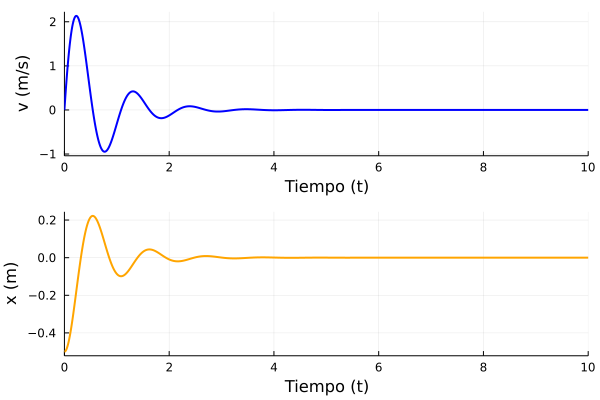

In [22]:
function suspensión()
    m = 0.5 #kg
    k = 18.0 #N/M
    c = 1.5 #Ns/M
    x0 = -0.5 #M
    dx0 = 0.0 #m/s
    tspan= (0.0,10.0) #s
    p = [m,k,c]

    f!(dx,x,p,t) = -1/p[1] * (p[2]*x + p[3]*dx)

    
    prob = SecondOrderODEProblem(f!,dx0,x0,tspan,p)
    sol = solve(prob)
    
    plot(sol,
     linewidth=2,
     xlabel="Tiempo (t)",
     ylabel=["v (m/s)" "x (m)"],
     color=["blue" "orange"],
     legend=false,
     layout=(2,1))
end
suspensión()